# Import Resources

In [ ]:
import random
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import copy

# Define Bus and Line

In [ ]:
class Busses:
    def __init__(self, ID, energy, price, isProducer):
        self.ID = ID
        self.energy = energy
        self.price = price
        self.isProducer = isProducer

# Example usage:
# Create a consumer
consumer1 = Busses(ID=1, energy=50, price=10, isProducer=False)
# Create a prosumer (producer-consumer)
prosumer1 = Busses(ID=2, energy=100, price=8, isProducer=True)

# Accessing attributes
print("Consumer ID:", consumer1.ID)
print("Consumer Energy:", consumer1.energy)
print("Consumer Price:", consumer1.price)
print("Is Consumer a Producer?", consumer1.isProducer)

print("Prosumer ID:", prosumer1.ID)
print("Prosumer Energy:", prosumer1.energy)
print("Prosumer Price:", prosumer1.price)
print("Is Prosumer a Producer?", prosumer1.isProducer)

class Line:
    def __init__(self, nodes, lineCapacity, operCost):
        self.nodes = nodes
        self.lineCapacity = lineCapacity
        self.operCost = operCost
        self.staticLineCapacity= lineCapacity

# Example usage:
# Create two busses
bus1 = Busses(ID=1, energy=50, price=10, isProducer=False)
bus2 = Busses(ID=2, energy=100, price=8, isProducer=True)

# Create a line connecting the two busses
line1 = Line(nodes=(bus1, bus2), lineCapacity=200, operCost=0.5)
line1.lineCapacity-=20
# Accessing attributes
for node in line1.nodes:
    print("Node ID:", node.ID)

print("Line Capacity:", line1.staticLineCapacity)
print("Line Operating Cost:", line1.lineCapacity)

Consumer ID: 1
Consumer Energy: 50
Consumer Price: 10
Is Consumer a Producer? False
Prosumer ID: 2
Prosumer Energy: 100
Prosumer Price: 8
Is Prosumer a Producer? True
Node ID: 1
Node ID: 2
Line Capacity: 200
Line Operating Cost: 180


# Define Grid

In [ ]:
# Create 6 busses
busses_pro = [Busses(ID=i, energy=random.randint(10, 40), price=random.uniform(5, 12), isProducer=True) for i in range(1, 5)]
busses_con = [Busses(ID=40+i, energy=random.randint(30, 80), price=random.uniform(8, 15), isProducer=False) for i in range(1, 5)]
busses=busses_pro+busses_con
# Create random connections between busses
matrix_size = (len(busses), len(busses))
random_matrix = [[random.random() for _ in range(matrix_size[1])] for _ in range(matrix_size[0])]

print(random_matrix)


lines = []
for i in range(len(busses)):
    for j in range(i+1, len(busses)):
        if random_matrix[i][j] < 0.5:  # 50% probability of creating a line between two busses
            line_capacity = random.randint(20, 40)
            line_cost = random.uniform(0.1, 0.5)
            lines.append(Line(nodes=(busses[i], busses[j]), lineCapacity=line_capacity, operCost=line_cost))

lines_void_capacity=[]
busses_void_capacity=[]

for bus in busses:
  bus_void_capacity=Busses(ID=bus.ID, energy=bus.ID, price=bus.price, isProducer=bus.isProducer)
  busses_void_capacity.append(bus_void_capacity)


for i in range(len(busses)):
    for j in range(i+1, len(busses)):
        if random_matrix[i][j] < 0.5:  # 50% probability of creating a line between two busses
            line_capacity = 500000
            line_cost = 0
            lines_void_capacity.append(Line(nodes=(busses_void_capacity[i], busses_void_capacity[j]), lineCapacity=line_capacity, operCost=line_cost))



# Print busses and lines
print("Busses:")
for bus in busses:
    print("ID:", bus.ID, "Energy:", bus.energy, "Price:", bus.price, "Is Producer:", bus.isProducer)

print("\nLines:")
for line in lines:
    print("Nodes:", [node.ID for node in line.nodes], "Line Capacity:", line.lineCapacity, "Operational Cost:", line.operCost)

print("\nLines:")
for line in lines_void_capacity:
    print("Nodes:", [node.ID for node in line.nodes], "Line Capacity:", line.lineCapacity, "Operational Cost:", line.operCost)

[[0.6681307476558599, 0.10319052102760784, 0.08154039242808897, 0.0708997623051103, 0.9625491917234904, 0.3114429888583319, 0.6898553095884004, 0.9644556536876702], [0.2245283303642731, 0.7555799963785926, 0.500432927719971, 0.40405183745141493, 0.8566404647473107, 0.857245532702262, 0.18389134570295895, 0.21775868073419458], [0.4653577278111872, 0.7499355335710309, 0.3932933244847323, 0.6810821905176736, 0.6863784177475883, 0.27693669222588224, 0.5941882134745001, 0.7419659642428268], [0.4948254152960647, 0.23692208267009518, 0.531651335622632, 0.5555999629039973, 0.24051488618475814, 0.0545160904668337, 0.6093104063728012, 0.035384248383408146], [0.948613900751318, 0.866734406361066, 0.08905237933291921, 0.9526576689761739, 0.8481938460795797, 0.5784634519699975, 0.09268790371514812, 0.06970186102554587], [0.12905491983222572, 0.05991356800680214, 0.9892953880649512, 0.009211508354229903, 0.48248535778760326, 0.953290420776997, 0.07320245937460257, 0.8798631179332915], [0.42278220699

# Sorting Buses for Searching

In [ ]:
def sort_connected_busses(input_bus):
    connected_busses = []

    # Find all busses connected to the input_bus
    for line in lines:
        if input_bus in line.nodes:
            connected_busses.append(line.nodes[0] if line.nodes[1] == input_bus else line.nodes[1])

    # Filter busses based on conditions
    filtered_busses = [bus for bus in connected_busses if ((bus.price <= input_bus.price and bus.isProducer) or (not bus.isProducer)) ]
    for bus in filtered_busses:
      print("ID:", bus.ID, "Energy:", bus.energy, "Price:", bus.price, "Is Producer:", bus.isProducer)
    # Sort the filtered busses based on the specified levels
    producers = [obj for obj in filtered_busses if obj.isProducer]
    consumers = [obj for obj in filtered_busses if not obj.isProducer]
    sorted_busses_pro = sorted(producers, key=lambda x: (x.price, -line_capacity_of(x, input_bus)))
    sorted_busses_con = sorted(consumers, key=lambda x: (x.price, -line_capacity_of(x, input_bus)))
    sorted_busses=sorted_busses_pro+sorted_busses_con

    return sorted_busses

# Helper function to get line capacity between two busses
def line_capacity_of(bus1, bus2):
    for line in lines:
        if (line.nodes[0] == bus1 and line.nodes[1] == bus2) or (line.nodes[0] == bus2 and line.nodes[1] == bus1):
            return line.lineCapacity
    return 0  # Default capacity if no direct connection found

# Example usage
input_bus = busses[1]  # Assuming the first bus as input
sorted_busses = sort_connected_busses(input_bus)
print("Busses connected to input_bus, sorted based on the described algorithm:")
for bus in sorted_busses:
    print("ID:", bus.ID, "Energy:", bus.energy, "Price:", bus.price, "Is Producer:", bus.isProducer)

ID: 1 Energy: 11 Price: 8.091968540185167 Is Producer: True
ID: 4 Energy: 36 Price: 7.522149455622755 Is Producer: True
ID: 43 Energy: 79 Price: 10.619823410021203 Is Producer: False
ID: 44 Energy: 52 Price: 13.622068779744005 Is Producer: False
Busses connected to input_bus, sorted based on the described algorithm:
ID: 4 Energy: 36 Price: 7.522149455622755 Is Producer: True
ID: 1 Energy: 11 Price: 8.091968540185167 Is Producer: True
ID: 43 Energy: 79 Price: 10.619823410021203 Is Producer: False
ID: 44 Energy: 52 Price: 13.622068779744005 Is Producer: False


# Double Auction

In [ ]:
total_energy = []
total_transact = []
welfare_matrix = []
loss_tax = 0.3
#############################################
def perform_double_auction(start_bus):
    auction_result = {}
    visited = set()
    master_bus=start_bus
    queue = deque([(start_bus, None)])  # Start from the given bus and its parent

    while queue:
        current_bus, parent_line = queue.popleft()
        if current_bus in visited:
            continue

        visited.add(current_bus)
        print(current_bus.ID)
        # Sort branches using the sort_connected_busses function
        sorted_branches = sort_connected_busses(current_bus)
        for connected_bus in sorted_branches:
            # Find the line connecting current_bus and connected_bus
            line = None
            for l in lines:
                if current_bus in l.nodes and connected_bus in l.nodes:
                    line = l
                    break
            if master_bus.energy>0:
              queue.append((connected_bus, line))
              if line is not None and connected_bus not in visited:
                energy_transferred = min(master_bus.energy, connected_bus.energy)
                total_energy.append(energy_transferred)
                if connected_bus.isProducer and connected_bus.price<master_bus.price and line.lineCapacity>energy_transferred:
                    master_bus.energy-=energy_transferred
                    operational_cost = line.operCost * energy_transferred
                    transfer_cost = connected_bus.price*energy_transferred
                    line.lineCapacity-=energy_transferred
                    total_transact.append(energy_transferred)
                    welfare = (1.4*(operational_cost+transfer_cost))-((energy_transferred**2)*loss_tax)
                    welfare_matrix.append(welfare)
                    auction_result[(master_bus.ID, connected_bus.ID)] = {
                        'energy_transferred': energy_transferred,
                        'line_capacity': line.lineCapacity,
                        'operational_cost': operational_cost,
                        'transfer_cost': transfer_cost
                    }
            else:
              break

    return auction_result
master_busses=copy.deepcopy(busses)
# Example usage
auction_results=[]
for start_bus in busses:
  if not start_bus.isProducer:
    auction_result = perform_double_auction(start_bus)
    auction_results.append(auction_result)
    print(str(start_bus.ID)+" Auction Result:")
    for connection, details in auction_result.items():
        print("Connection:", connection, "Energy Transferred:", details['energy_transferred'], "Line Capacity:", details['line_capacity'], "Operational Cost:", details['operational_cost'], "Transfer Cost:", details['transfer_cost'])
print(auction_results)
##### COMPUTE EVALUATION ###########
total_energy = [element for element in total_energy if element != 0]
total_transact = [element for element in total_transact if element != 0]
print("Energy Matrix", total_energy)
print("Transaction Matrix", total_transact)
print("Welfare matrix: ", welfare_matrix)
sum_total = sum(total_energy)
min_transact = min(total_transact)
epsilon = sum_total/min_transact
r_value = max(total_transact)/min(total_transact)
#print("Min of Energy Matrix: ", min_total)
#print("Sum of Energy Matrix: ", sum_total)
print("Epsilon Value: ", epsilon)
print("r Value: ", r_value)

41
ID: 4 Energy: 36 Price: 7.522149455622755 Is Producer: True
ID: 43 Energy: 79 Price: 10.619823410021203 Is Producer: False
ID: 44 Energy: 52 Price: 13.622068779744005 Is Producer: False
4
ID: 41 Energy: 39 Price: 10.96218949675052 Is Producer: False
ID: 42 Energy: 43 Price: 11.271145337971461 Is Producer: False
ID: 44 Energy: 52 Price: 13.622068779744005 Is Producer: False
43
ID: 2 Energy: 30 Price: 9.747182458588794 Is Producer: True
ID: 41 Energy: 39 Price: 10.96218949675052 Is Producer: False
ID: 42 Energy: 43 Price: 11.271145337971461 Is Producer: False
44
ID: 2 Energy: 30 Price: 9.747182458588794 Is Producer: True
ID: 4 Energy: 36 Price: 7.522149455622755 Is Producer: True
ID: 41 Energy: 9 Price: 10.96218949675052 Is Producer: False
42
ID: 1 Energy: 11 Price: 8.091968540185167 Is Producer: True
ID: 4 Energy: 36 Price: 7.522149455622755 Is Producer: True
ID: 43 Energy: 79 Price: 10.619823410021203 Is Producer: False
2
ID: 1 Energy: 11 Price: 8.091968540185167 Is Producer: True
I

# Graph with line Capacities

4


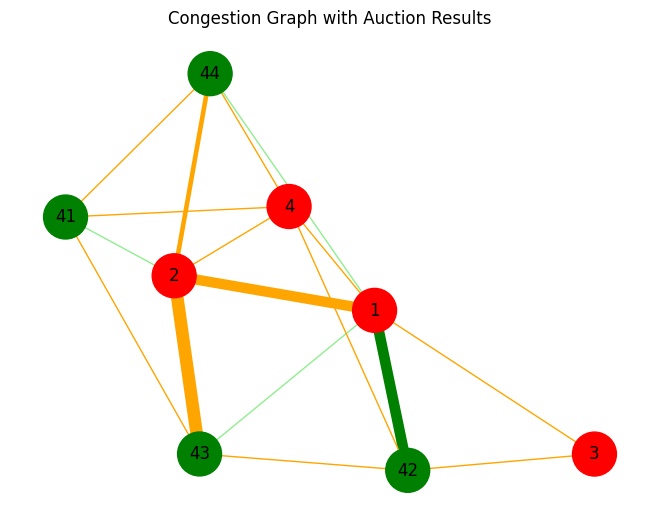

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
for bus in busses:
    G.add_node(bus.ID, is_producer=bus.isProducer)

# Add edges for lines.nodes (dark yellow lines)
for line in lines:
    G.add_edge(line.nodes[0].ID, line.nodes[1].ID, color='orange', line_capacity=(line.lineCapacity, line.staticLineCapacity))

count=0
# Add edges for auction results (green lines)
for auction_result in auction_results:
    for connection, details in auction_result.items():
        count+=1
        u, v = connection
        if not G.has_edge(u, v):
            G.add_edge(u, v, color='lightgreen', line_capacity=(1, 1), style='dashed')
        else:
            G.edges[u, v]['color'] = 'green'
print(count)

# Define node colors based on isProducer flag
node_colors = ['red' if G.nodes[node]['is_producer'] else 'green' for node in G.nodes]

# Define edge colors
edge_colors = [G[u][v]['color'] for u, v in G.edges]

#edge width
edge_widths = [(((G[u][v]['line_capacity'][1] - G[u][v]['line_capacity'][0]) / G[u][v]['line_capacity'][1])*10+1) for u, v in G.edges]
# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, edge_color=edge_colors, width=edge_widths)

# Add edge labels for auction results
'''for auction_result in auction_results:
    edge_labels = {(u, v): f"Energy: {details['energy_tsransferred']}, Cost: (round{details['operational_cost']}+{details['transfer_cost']})" for (u, v), details in auction_result.items()}
    for edge, label in edge_labels.items():
      x0, y0 = pos[edge[0]]
      x1, y1 = pos[edge[1]]
      x = (x0 + x1) / 2  # Midpoint x-coordinate
      y = (y0 + y1) / 2  # Midpoint y-coordinate
      dx = 0  # Horizontal offset (can be adjusted)
      dy = 0.1  # Vertical offset in units (1 cm in this case)
      plt.text(x + dx, y + dy, label, horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')'''

plt.title("Congestion Graph with Auction Results")
plt.show()


#Double Auction (No Line Capacities)

In [ ]:
total_energy_no_LC = []
total_transact_no_LC = []
welfare_matrix_no_LC = []
loss_tax = 0.3
###############################################
def sort_connected_busses_no_lc(input_bus):
    connected_busses = []

    # Find all busses connected to the input_bus
    for line in lines_void_capacity:
        if input_bus in line.nodes:
            connected_busses.append(line.nodes[0] if line.nodes[1] == input_bus else line.nodes[1])

    # Filter busses based on conditions
    filtered_busses = [bus for bus in connected_busses if ((bus.price <= input_bus.price and bus.isProducer) or (not bus.isProducer)) ]
    for bus in filtered_busses:
      print("ID:", bus.ID, "Energy:", bus.energy, "Price:", bus.price, "Is Producer:", bus.isProducer)
    # Sort the filtered busses based on the specified levels
    producers = [obj for obj in filtered_busses if obj.isProducer]
    consumers = [obj for obj in filtered_busses if not obj.isProducer]
    sorted_busses_pro = sorted(producers, key=lambda x: (x.price, -line_capacity_of(x, input_bus)))
    sorted_busses_con = sorted(consumers, key=lambda x: (x.price, -line_capacity_of(x, input_bus)))
    sorted_busses=sorted_busses_pro+sorted_busses_con

    return sorted_busses

def perform_double_auction_no_lc(start_bus):
    auction_result = {}
    visited = set()
    master_bus=start_bus
    queue = deque([(start_bus, None)])  # Start from the given bus and its parent

    while queue:
        current_bus, parent_line = queue.popleft()
        if current_bus in visited:
            continue

        visited.add(current_bus)
        print(current_bus.ID)
        # Sort branches using the sort_connected_busses function
        sorted_branches = sort_connected_busses_no_lc(current_bus)
        print(sorted_branches)
        for connected_bus in sorted_branches:
            # Find the line connecting current_bus and connected_bus
            line = None
            for l in lines_void_capacity:
                if current_bus in l.nodes and connected_bus in l.nodes:
                    line = l
                    print(line.nodes)
                    break
            if master_bus.energy>0:
              queue.append((connected_bus, line))
              if line is not None and connected_bus not in visited:
                energy_transferred_1 = min(master_bus.energy, connected_bus.energy)
                total_energy_no_LC.append(energy_transferred_1)
                if connected_bus.isProducer and connected_bus.price<master_bus.price and line.lineCapacity>0:
                    energy_transferred = min(master_bus.energy, connected_bus.energy)
                    master_bus.energy-=energy_transferred
                    operational_cost = line.operCost * energy_transferred
                    transfer_cost = connected_bus.price*energy_transferred
                    line.lineCapacity-=energy_transferred
                    total_transact_no_LC.append(energy_transferred)
                    welfare_no_LC = (1.4*(operational_cost+transfer_cost))-((energy_transferred**2)*loss_tax)
                    welfare_matrix_no_LC.append(welfare_no_LC)
                    auction_result[(master_bus.ID, connected_bus.ID)] = {
                        'energy_transferred': energy_transferred,
                        'line_capacity': line.lineCapacity,
                        'operational_cost': operational_cost,
                        'transfer_cost': transfer_cost
                    }
            else:
              break

    return auction_result
busses=busses_void_capacity
# Example usage
auction_results=[]
for start_bus in busses:
  if not start_bus.isProducer:
    auction_result = perform_double_auction_no_lc(start_bus)
    auction_results.append(auction_result)
    print("Auction Result:")
    for connection, details in auction_result.items():
        print("Connection:", connection, "Energy Transferred:", details['energy_transferred'], "Line Capacity:", details['line_capacity'], "Operational Cost:", details['operational_cost'], "Transfer Cost:", details['transfer_cost'])
##### COMPUTE EVALUATION ###########
total_energy_no_LC = [element for element in total_energy if element != 0]
total_transact_no_LC = [element for element in total_transact if element != 0]
print("Energy Matrix No LC", total_energy_no_LC)
print("Transaction Matrix No LC", total_transact_no_LC)
print("Welfare matrix No LC: ", welfare_matrix_no_LC)
sum_total = sum(total_energy_no_LC)
min_transact = min(total_transact_no_LC)
epsilon = sum_total/min_transact
r_value = max(total_transact_no_LC)/min(total_transact_no_LC)
#print("Min of Energy Matrix: ", min_total)
#print("Sum of Energy Matrix: ", sum_total)
print("Epsilon Value: ", epsilon)
print("r Value: ", r_value)


41
ID: 4 Energy: 4 Price: 7.522149455622755 Is Producer: True
ID: 43 Energy: 43 Price: 10.619823410021203 Is Producer: False
ID: 44 Energy: 44 Price: 13.622068779744005 Is Producer: False
[<__main__.Busses object at 0x7b2084c74eb0>, <__main__.Busses object at 0x7b2084c74d90>, <__main__.Busses object at 0x7b2084c74d30>]
(<__main__.Busses object at 0x7b2084c74eb0>, <__main__.Busses object at 0x7b2084c74e50>)
(<__main__.Busses object at 0x7b2084c74e50>, <__main__.Busses object at 0x7b2084c74d90>)
(<__main__.Busses object at 0x7b2084c74e50>, <__main__.Busses object at 0x7b2084c74d30>)
4
ID: 41 Energy: 37 Price: 10.96218949675052 Is Producer: False
ID: 42 Energy: 42 Price: 11.271145337971461 Is Producer: False
ID: 44 Energy: 44 Price: 13.622068779744005 Is Producer: False
[<__main__.Busses object at 0x7b2084c74e50>, <__main__.Busses object at 0x7b2084c74df0>, <__main__.Busses object at 0x7b2084c74d30>]
(<__main__.Busses object at 0x7b2084c74eb0>, <__main__.Busses object at 0x7b2084c74e50>)


# Graph without Line Capacities

12


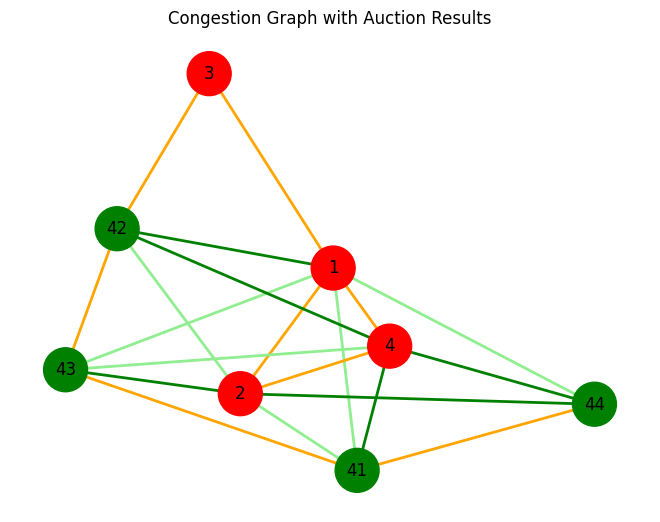

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
for bus in busses:
    G.add_node(bus.ID, is_producer=bus.isProducer)

# Add edges for lines.nodes (dark yellow lines)
for line in lines:
    G.add_edge(line.nodes[0].ID, line.nodes[1].ID, color='orange')
count=0
# Add edges for auction results (green lines)
for auction_result in auction_results:
    for connection, details in auction_result.items():
        count+=1
        u, v = connection
        if not G.has_edge(u, v):
            G.add_edge(u, v, color='lightgreen', style='dashed')
        else:
            G.edges[u, v]['color'] = 'green'
print(count)
# Define node colors based on isProducer flag
node_colors = ['red' if G.nodes[node]['is_producer'] else 'green' for node in G.nodes]

# Define edge colors
edge_colors = [G[u][v]['color'] for u, v in G.edges]

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, edge_color=edge_colors, width=2.0)

# Add edge labels for auction results
'''for auction_result in auction_results:
    edge_labels = {(u, v): f"Energy: {details['energy_transferred']}, Cost: (round{details['operational_cost']}+{details['transfer_cost']})" for (u, v), details in auction_result.items()}
    for edge, label in edge_labels.items():
      x0, y0 = pos[edge[0]]
      x1, y1 = pos[edge[1]]
      x = (x0 + x1) / 2  # Midpoint x-coordinate
      y = (y0 + y1) / 2  # Midpoint y-coordinate
      dx = 0  # Horizontal offset (can be adjusted)
      dy = 0.1  # Vertical offset in units (1 cm in this case)
      plt.text(x + dx, y + dy, label, horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')'''

plt.title("Congestion Graph with Auction Results")
plt.show()
